**INTRODUCTION**




The goal of this project is an extensive analysis of the data science job market. The investigation incorporates data exploration, visualization, and the application of machine learning methodologies. Our focus will be on extracting meaningful patterns and relationships embedded in the dataset. This detailed study serves not only to enhance our comprehension of the data science field but also to bolster our proficiency in data analysis and machine learning.

Our first course of action involves importing the salary dataset into our Python workspace utilizing the pandas library. We will initially scrutinize the data structure to understand its layout and obtain a preliminary overview of its contents. we will delve deeper into the dataset through exploratory data analysis, followed by data visualization, and finally, we will deploy machine learning models to further identify any underlying patterns or relationships

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Premilinary** **Analysis**

In [4]:
#Reading data into the work area
Data_Science_Salary = pd.read_csv("Salaries.csv")

In [5]:
Data_Science_Salary.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [6]:
Data_Science_Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [7]:
Data_Science_Salary.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [8]:
Data_Science_Salary.shape

(3755, 11)

This shows that we have three thousand,seven hundred and fifty five rows and eleven columns

In [9]:
# checking for duplicates
Data_Science_Salary.duplicated().sum()

1171

The otput above shows that we have one thousand one hundred and seventy one duplicate data in the dataset

In [10]:
# removing duplicates
Data_Science_Salary = Data_Science_Salary.drop_duplicates(keep="first")
Data_Science_Salary.shape

(2584, 11)

**Removal** **of** **all** **the** **dublicate** **data** **in** **the** **row**

In [11]:
# check for missing values
Data_Science_Salary.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

**Salary** **distibution** **by** **Work** **Year**

Text(0.0, 1.0, 'Salaries paid in each year')

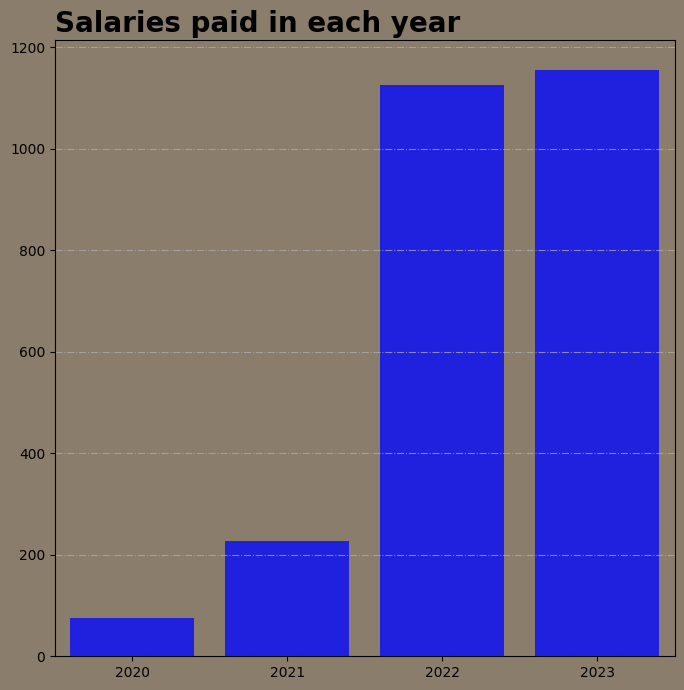

In [12]:
#facecolor of the plot
background = "#8B7D6B"

# make the figure
fig, ax = plt.subplots(1,1, figsize=(8,8), facecolor=background)
ax.set_facecolor(background)

# make the plot
sns.countplot(x=Data_Science_Salary.work_year, color="#0000FF")

# add annotations

# add grid
ax.grid(axis="y", linestyle="-.", alpha=0.7)

# customize the visualization
plt.xlabel("")
plt.ylabel("")

#adding tittle
plt.title("Salaries paid in each year", loc="left", size=20, weight="bold")



The above chart shows salary across all years in the dataset, which shows that 2023 is the year with the largest salary and decreasing across the year which makes 2020 the year with the lowest salary.

**Level** **of** **Experience**

Text(-0.5, 1775, 'Level Of Experience')

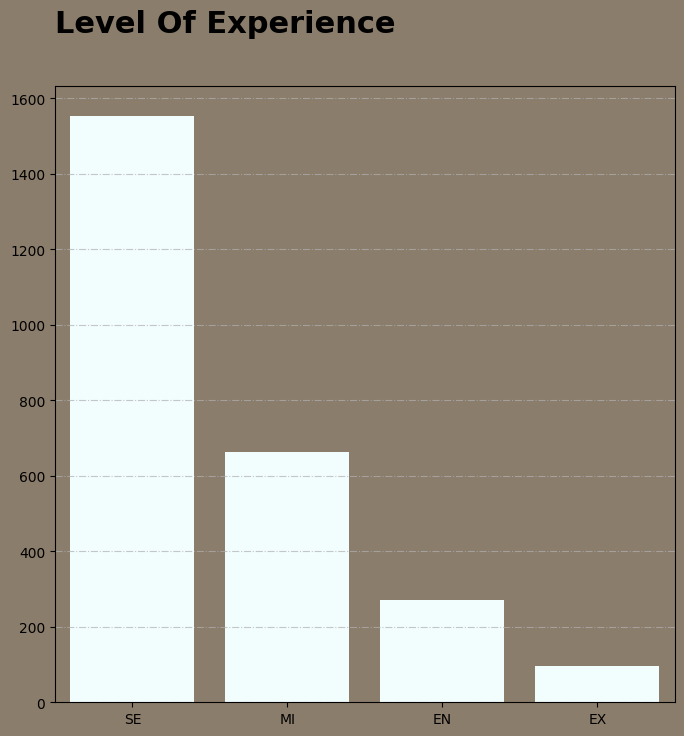

In [13]:
fig, ax = plt.subplots(1,1, figsize=(8,8), facecolor=background)
ax.set_facecolor(background)

sns.countplot(x=Data_Science_Salary.experience_level, color="#F0FFFF")

plt.grid(axis="y", linestyle="-.", alpha=0.7)

plt.xlabel("")
plt.ylabel("")

ax.text(-0.5, 1775, "Level Of Experience", size="22", weight="bold")


From the above chart which shows the level experience, we can see from the output that vast majority of the employees are in senior position while the executive position has the least number of employees.

**Selection** **of** **Common** **Job** **Tittle**

Text(0, -1.5, '10 Most common Jobtitle')

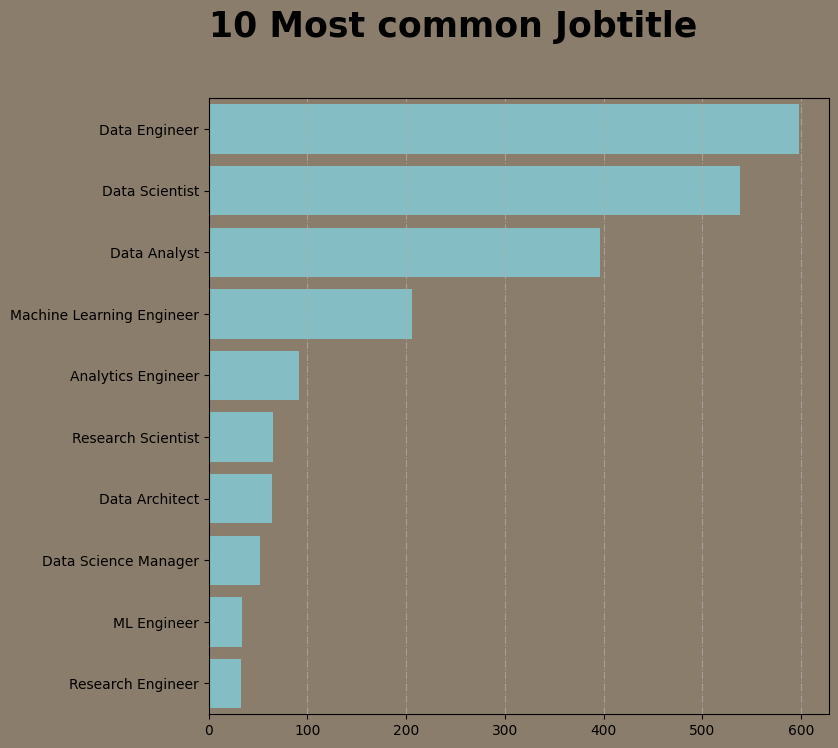

In [14]:
Job_Tittle_Rank = Data_Science_Salary.job_title.value_counts().iloc[:10]
fig, ax = plt.subplots(1,1, figsize=(8,8), facecolor=background)
ax.set_facecolor(background)

sns.barplot(x=Job_Tittle_Rank.values, y=Job_Tittle_Rank.index, color="#7AC5CD", orient="h")

plt.grid(axis="x", linestyle="-.", alpha=0.7)

plt.text(0, -1.5, "10 Most common Jobtitle", size=25, weight="bold")

The above chart gives an output of the top 10 jobtitle in data science field ,we can see that the Data Engineer has the highest number of employees followed by Data scientist and Data Analyst respectively and we can also see that some jobtitle has the same number of employees such as (Research Scientist and Data Architect) and (ML Engineer and Research Engineer).

**Salary** **Distribution**

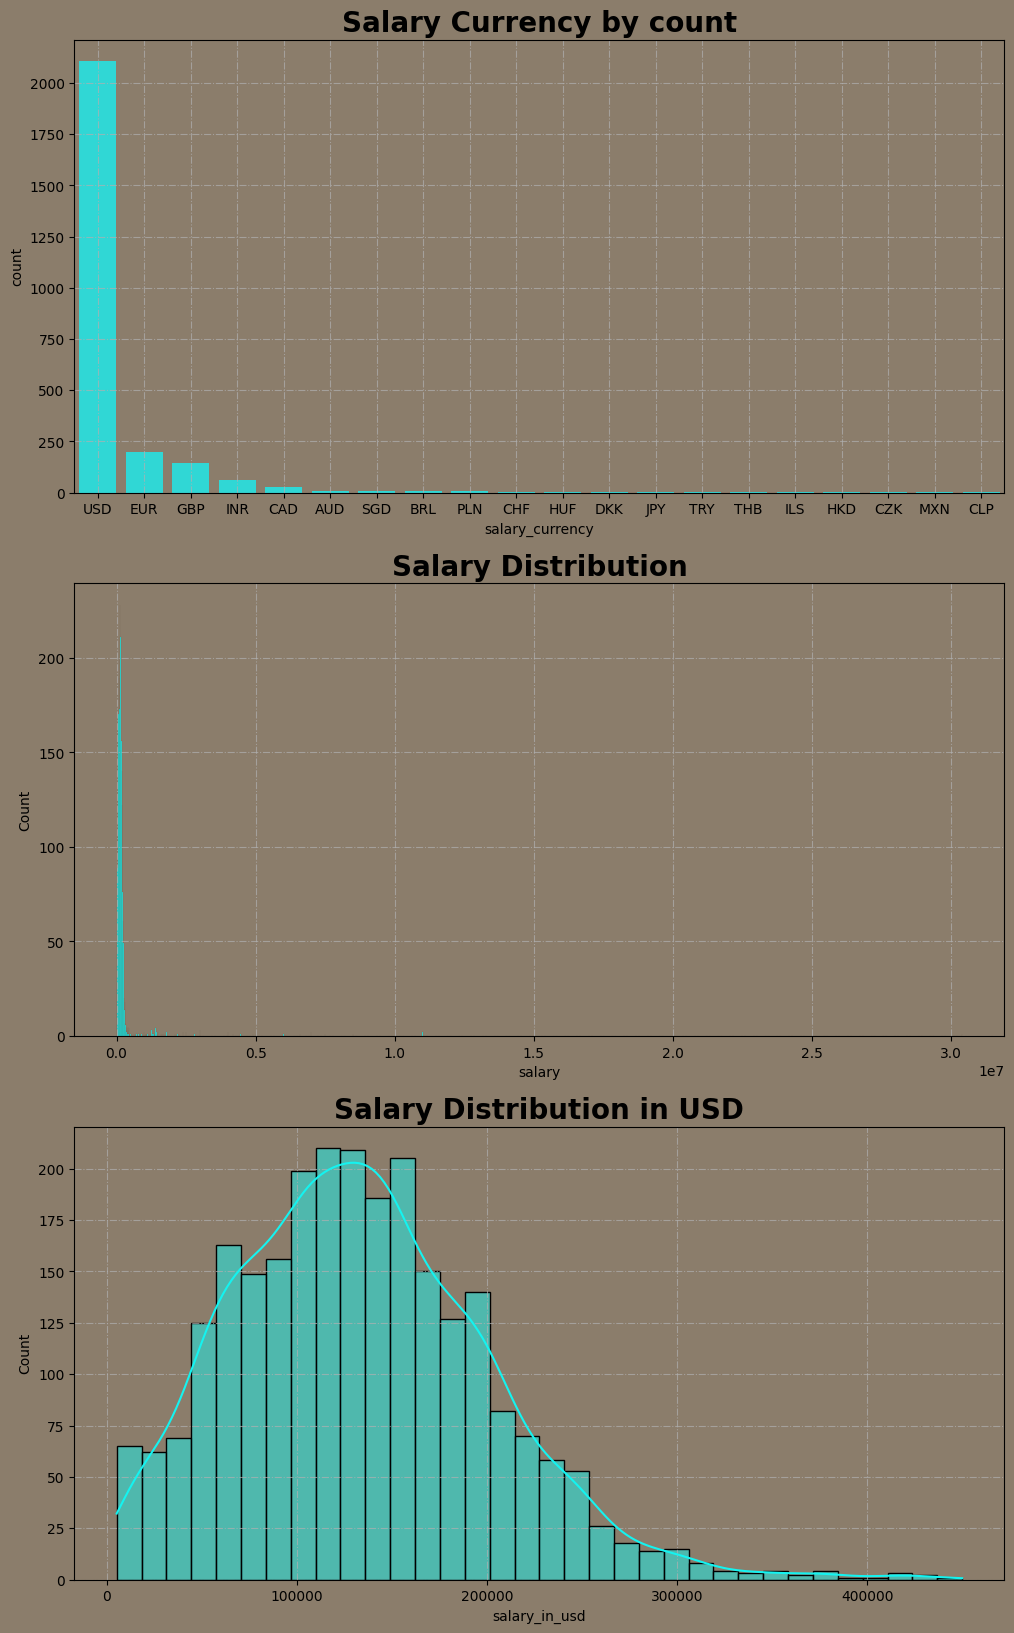

In [15]:
fig = plt.figure(figsize=(12, 20), facecolor=background)
gs = fig.add_gridspec(3,1)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[2,0])

for ax in fig.axes:
    ax.set_facecolor(background)

sns.countplot(x=Data_Science_Salary["salary_currency"], order=Data_Science_Salary["salary_currency"].value_counts().index,
             color="#14F3F0", ax=ax0)
sns.histplot(x=Data_Science_Salary["salary"], color="#14F3F0", ax=ax1)
sns.histplot(x=Data_Science_Salary["salary_in_usd"], kde=True,  color="#14F3F0", ax=ax2)
ax0.set_title("Salary Currency by count", size=20, weight="bold", loc="center")
ax1.set_title("Salary Distribution", size=20, weight="bold", loc="center")
ax2.set_title("Salary Distribution in USD", size=20, weight="bold", loc="center")

for ax in fig.axes:
    ax.grid(True, linestyle="-.", alpha=0.7)

The above plots shows the highest salary currency by counting and distribution, from both ploths we can see that USD is the highest currency for salary which means that larger number of employees are paid in USD.

**Recidence** **of** **Employee**

In [16]:
#installing pycountry
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 42.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=2e07608bd97c5c46352c6e12a881112752f60ba3d7072f892b10b77d95a26ade
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [17]:
# convert the employee residence which is in ISO alpha 2 into ISO-3
import pycountry
Data_Science_Salary["ISO-3_emp"] = [pycountry.countries.get(alpha_2=code).alpha_3 for code in Data_Science_Salary["employee_residence"]]

The above code helps go through the country code in the employee residence column and convert from two letters country code format to three letters country code format and store in a new column.

In [18]:
# group the data
employee_residence = Data_Science_Salary.groupby("ISO-3_emp").size().reset_index(name="count")

In [19]:
#Installing geopandas
%pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 91.3 MB/s eta 0:00:00


In [20]:
import geopandas as gpd
import plotly.graph_objects as go

# Load the world map data
Residence__Employee_Map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a choropleth map based on the count of employees in each country
fig = go.Figure(data=go.Choropleth(
    locations=employee_residence["ISO-3_emp"],
    z=employee_residence["count"],
    colorscale='Teal',
    locationmode="ISO-3",
    marker_line_color='black',
    marker_line_width=0.5,
    colorbar_title='Count of Employees'
))

# Set the layout of the map
fig.update_layout(title=" Residence Of Employee By Their Country",
    width=1000,  # set the width of the figure to 800 pixels
    height=500,  # set the height of the figure to 500 pixels
    plot_bgcolor=background  # set the background color of the plot to white
)
# Show the map
fig.show()

The output is an interactive map that shows the distribution of employee residences across the world, thereby providing a global view of the employee demographics based on their country of residence.The map shows that USA has the highest count of employee and Canada has a a quite large numbers too.

**Location** **of** **Company**

In [21]:
# change location into ISO-3
Data_Science_Salary["ISO-3_comp"] = [pycountry.countries.get(alpha_2=code).alpha_3 for code in Data_Science_Salary["company_location"]]

In [22]:
# group the data
company_location = Data_Science_Salary.groupby("ISO-3_comp").size().reset_index(name="count").sort_values(by="count",
                                                                                               ascending=False)


In [23]:
# create a geo map
import geopandas as gpd
import plotly.graph_objects as go

# Load the world map data
world_country_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a choropleth map based on the count of employees in each country
fig = go.Figure(data=go.Choropleth(
    locations=company_location["ISO-3_comp"],
    z=company_location["count"],
    colorscale='Teal',
    locationmode="ISO-3",
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='Count of Companies'
))
# Set the layout of the map
fig.update_layout(
    title="Company Location by count",
    width=1000,  # set the width of the figure to 800 pixels
    height=500,  # set the height of the figure to 500 pixels
    plot_bgcolor=background  # set the background color of the plot to white
)
# Show the map
fig.show()

The output is an interactive map that shows the distribution of company location across the world, thereby providing a global view of the company based on the location and we can see that Canada is the country with the highest number of companies.

Company Size

Text(0.0, 1.0, 'Company Size')

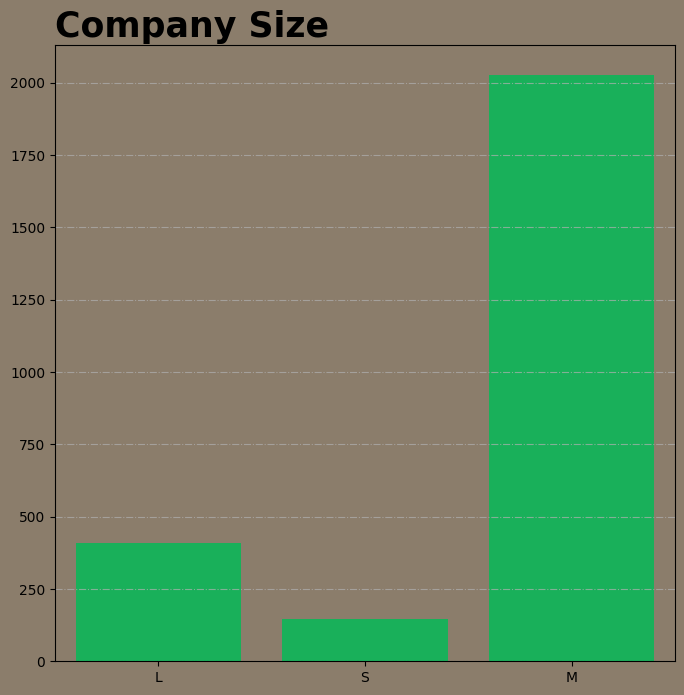

In [24]:
fig, ax= plt.subplots(1,1, figsize=(8,8), facecolor=background)
ax.set_facecolor(background)

sns.countplot(x=Data_Science_Salary["company_size"], color="#00C957")

plt.grid(axis="y", linestyle="-.", alpha=0.7)

plt.xlabel("")
plt.ylabel("")

plt.title("Company Size", loc="left", size=25, weight="bold")

The final output is a visual representation of the distribution of company sizes in the Data_Science_Salary DataFrame. This plot provides an immediate and clear understanding of the most common and least common company sizes in the dataset, thereby offering insights into the range and diversity of company sizes within the data science job market.We can see from the output that Company size M has the highest number folloowed by Large and Small has the least on the graph.

**Model** **Building**

In [25]:
# copy the data
Data_Science_Salary_copy = Data_Science_Salary.copy()
#  categorica#l data sorting
Data_Science_Salary_copy["job_title"].value_counts()

Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
                            ... 
Compliance Data Analyst        1
Deep Learning Researcher       1
Staff Data Analyst             1
Data DevOps Engineer           1
Finance Data Analyst           1
Name: job_title, Length: 93, dtype: int64

Creating a copy of the original data frame and perform a frequency count operation on the job tittle to count the occurence of each unique value in a dataframe column and the ouput shows the count of the most frequent job tittle with Data Engineer has the highest because it was sorted in descending order. In contrast, several roles such as "Compliance Data Analyst," "Deep Learning Researcher," "Staff Data Analyst," "Data DevOps Engineer," and "Finance Data Analyst" are rare and appear only once in the dataset.

In [26]:
#defining function
def Add_job_title(job_title):
    if job_title in ["Data Engineer", "Data Scientist", "Data Analyst", "Machine Learning Engineer"]:
        return job_title
    else:
        return "Other"

Data_Science_Salary_copy["new_job_title"] =Data_Science_Salary_copy["job_title"].apply(Add_job_title)
# first one done
Data_Science_Salary_copy["new_job_title"].value_counts()

Other                        846
Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Name: new_job_title, dtype: int64

The above define a function which help categorize any job title that is not listed in the defined job tittle as others.This help simplify the dataset or focus on the specified roles while grouping all other roles together. It help to reduce dimensionality and make the dataset less noisy when these main job titles are of particular interest.

In [27]:
# company location
Data_Science_Salary_copy["company_location"].value_counts()

Data_Science_Salary_copy["company_location"] = np.where(Data_Science_Salary["company_location"] == "US", 1,0)
Data_Science_Salary_copy.rename(columns={"company_location" : "New_company_location_US"}, inplace=True)
Data_Science_Salary_copy["New_company_location_US"].value_counts()

1    1929
0     655
Name: New_company_location_US, dtype: int64

 The code transforms the company_location column into a binary variable and result provides a clear numeric comparison between the number of companies based in the United States and those based elsewhere,then it counts the number of companies in each category where 1 indicates that the company is located in the United States and 0 indicates that the company is located outside the United States.

In [28]:
# employee residence
Data_Science_Salary_copy["employee_residence"].value_counts()

Data_Science_Salary_copy["employee_residence"] = np.where(Data_Science_Salary["employee_residence"]=="US", 1,0)
Data_Science_Salary_copy.rename(columns={"employee_residence" : "New_employee_residence_US"}, inplace=True)
Data_Science_Salary_copy["New_employee_residence_US"].value_counts()

1    1893
0     691
Name: New_employee_residence_US, dtype: int64

The code transforms the employee_residence column into a binary variable and result provides a clear numeric comparison between the number of employies based in the United States and those based elsewhere,then it counts the number of employees in each category where 1 indicates that the employee resides in the United States and 0 indicates that employee resides outside the United States.

**METHOD**


Bellow shows the methodology



 I will be looking into three diffent machine learning models which are Linear Regression,Random Forest Regression and Decision Tree Regression to check the model that fit, perform prediction using each of the model, validation on Mean absolute error regression loss and coefficient of determination.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

The above script involves the importation of several modules and functions from the sklearn library, which is a powerful tool for machine learning and statistical modeling in Python. The modules imported are typically used in the process of preprocessing data and building machine learning models.

In [30]:
# create first variable X
features = ["work_year", "experience_level", "New_employee_residence_US","employment_type",
            "New_company_location_US", "company_size","remote_ratio", "new_job_title"]
X = Data_Science_Salary_copy[features]
X.head()

,work_year,experience_level,New_employee_residence_US,employment_type,New_company_location_US,company_size,remote_ratio,new_job_title
0,2023,SE,0,FT,0,L,100,Other
1,2023,MI,1,CT,1,S,100,Other
2,2023,MI,1,CT,1,S,100,Other
3,2023,SE,0,FT,0,M,100,Data Scientist
4,2023,SE,0,FT,0,M,100,Data Scientist


This code segment above is preparing the necessary data (input features) that will be fed into a machine learning model to make predictions. The chosen features presumably hold important and meaningful information that can aid in predicting the outcome of the target variable.

In [31]:
# create second varaiable Y
Y = Data_Science_Salary_copy.salary_in_usd

 This code above designates salary_in_usd as the target variable in the forthcoming machine learning process, establishing what the predictive model will aim to estimate based on the input features.

In [32]:
# split the data into train and validation
X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y, train_size=0.8, random_state=0)

This division of data is critical in machine learning to prevent overfitting, where a model learns the training data too well and performs poorly on unseen data. The validation set serves as "unseen" data that is used to evaluate the model's performance and generalizability.
The code above is dividing the dataset into training and validation sets to both train the machine learning model and evaluate its performance.

In [33]:
 #select categorical columns
categorical_cols = Data_Science_Salary_copy.select_dtypes(include=["object", "category"]).columns
categorical_cols = categorical_cols.drop(["salary_currency", "job_title", "ISO-3_emp", "ISO-3_comp"])
categorical_cols


Index(['experience_level', 'employment_type', 'company_size', 'new_job_title'], dtype='object')

The code filters the categorical columns in the dataset and excludes specific ones that are not needed for the subsequent analysis or modeling process. The and the result shows the final selected categorical columns in the DataFrame which will be used for tasks such as feature encoding, which transforms categorical data into a format suitable for machine learning algorithms.






In [34]:

# select numerical cols
numerical_cols = Data_Science_Salary_copy.select_dtypes(include=["float", "int"]).columns
numerical_cols = numerical_cols.drop(["salary", "salary_in_usd"])
numerical_cols

Index(['work_year', 'New_employee_residence_US', 'remote_ratio',
       'New_company_location_US'],
      dtype='object')

The code filters the numerical columns in the dataset and excludes specific ones that are not needed for the subsequent analysis or modeling process. The and the result shows the final selected numerical columns in the DataFrame which will be used for tasks such as feature encoding, which transforms categorical data into a format suitable for machine learning algorithms.

In [35]:
# preprocessing steps for numerical data
numerical_transformer = SimpleImputer(strategy="median")

# prepoccesing steps for categorical data
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("hotencoder", OneHotEncoder(handle_unknown="ignore"))
])

# combine both
preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

This code above help sets up a series of transformations for both numerical and categorical data, which will be used in the subsequent steps of fitting a machine learning model. It ensures that missing values are addressed and that categorical variables are appropriately encoded before being used in a model.

**Linear** **Regression**

In [52]:
from sklearn.linear_model import LinearRegression

# define model
lr = LinearRegression()

In [53]:
# build the pipeline
lr_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("lr", lr)
])

# fit the model
lr_pipeline.fit(X_train, Y_train)

# get prediction
lr_Y_pred = lr_pipeline.predict(X_valid)

# mean absolute error
lr_mae = mean_absolute_error(Y_valid, lr_Y_pred)

# r2 score
lr_r2 = r2_score(Y_valid, lr_Y_pred)

print("MEA Linear Regression: ", lr_mae)
print("r2 Linear Regression: ", lr_r2)

MEA Linear Regression:  38230.55040758995
r2 Linear Regression:  0.4245870924735077


The performance of the model is evaluated using two metrics: mean absolute error (MAE) and the r-squared score (r2). MAE is the average absolute difference between the predicted and actual values, while the r2 score measures the proportion of variance in the target variable that is predictable from the features and the otput shows that the MAE is 38230.55,this means that on average, the model's predictions are approximately $38,230.55 away from the actual salary values and r2 score which s also the Validation Score is 0.4245870924735077 which means that approximately 42.46% of the variance in the target variable (salary) can be predicted from the input features.

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
lr_param_grid = {
       "lr__fit_intercept": [True, False]
}

#create Gridsearch object
lr_grid_search = GridSearchCV(lr_pipeline, lr_param_grid, cv=5)

# Fit the new GridSearchCV object on the training data
lr_grid_search.fit(X_train, Y_train)

# Print the best parameters and the validation set score
print("Best parameters: ", lr_grid_search.best_params_)
print("Crossvalidation score: ", lr_grid_search.best_score_)

Best parameters:  {'lr__fit_intercept': True}
Crossvalidation score:  0.38703425304882694


We perform a grid search to optimize the hyperparameters of a linear regression model, and the otput indicates that the best performance of the linear regression model is achieved when the fit_intercept parameter is set to True, which means the y-intercept was calculated for the line of best fit. While the cross-validation score suggests that the model is only able to explain about 38.7% of the variance in the salary, which might mean there is still room for improving the model.








In [62]:
# get the score for the validaton data
lr_valid_score = lr_grid_search.score(X_valid,Y_valid)

# print score
print("Validation Score: ", lr_valid_score)

Validation Score:  0.4245870924735077


# **Random** **Forest** **Regression**

In [56]:
# define Model
model = RandomForestRegressor(random_state=0)

In [57]:
# build the pipeline
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("rf", model)
])

# fit the model
rf_pipeline.fit(X_train, Y_train)

# get prediction
rf_Y_pred = rf_pipeline.predict(X_valid)

# mean absolute error
rf_mae = mean_absolute_error(Y_valid, rf_Y_pred)

# r2 score
rf_r2 = r2_score(Y_valid, rf_Y_pred)

print("MEA RandomForestRegressor: ", rf_mae)
print("r2 RandomForestregressor: ", rf_r2)

MEA RandomForestRegressor:  39462.081764647024
r2 RandomForestregressor:  0.3868188704964839


MEA RandomForestRegressor: 39462.081764647024: The mean absolute error for the RandomForestRegressor model is approximately 39462.08. This means, on average, the model's predictions are about $39462.08 away from the actual values.

r2 RandomForestRegressor: 0.3868188704964839: The r-squared score for the RandomForestRegressor model is approximately 0.39. This indicates that the RandomForestRegressor model can explain about 38.68% of the variance in the salary data.

In [58]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# define parameters
rf_param_grid = {
    "rf__n_estimators" : [50,100,200],
    "rf__max_depth" : [None, 5, 10],
    "rf__min_samples_split" : [2,5],
    "rf__min_samples_leaf" : [1,2]
}

# create Gridsearch object
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5)

# fit the Gridsearch object
rf_grid_search.fit(X_train, Y_train)


print("Best parameters: ", rf_grid_search.best_params_)
print("Cross validation score", rf_grid_search.best_score_)

Best parameters:  {'rf__max_depth': 5, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Cross validation score 0.3894017701816715


This indicates the combination of parameters that resulted in the highest cross-validation score. This suggests that the RandomForestRegressor is at its best model when max_depth of 5, min_samples_leaf of 1, min_samples_split of 2, and n_estimators of 100, While optimized model is expected to perform better than the one without parameter tuning, and was able to explain about 38.94% of the variance in the salary data during the cross-validation process

In [59]:
# get the score for the validation data
rf_valid_score = rf_grid_search.score(X_valid, Y_valid)

# print score
print("Validation Set Score: ", rf_valid_score)

Validation Set Score:  0.4241343441444847


The output Validation Set Score: 0.4241343441444847 shows the R2 score of the model on the validation data set. This means that approximately 42.41% of the variance in the target variable (salary) in the validation data can be explained by the model. This performance metric gives us a measure of the model's predictive accuracy on new, unseen data.

Decision Tree Regression

In [44]:
from sklearn.tree import DecisionTreeRegressor

# define model
dr = DecisionTreeRegressor(random_state=0)

In [45]:
dr_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("dr", dr)
])

# fit the model
dr_pipeline.fit(X_train, Y_train)

# get prediction
dr_Y_pred = dr_pipeline.predict(X_valid)

# mean absolute error
dr_mae = mean_absolute_error(Y_valid, dr_Y_pred)

# r2 score
dr_r2 = r2_score(Y_valid, dr_Y_pred)

print("MEA DecicionTreeRegressor: ", dr_mae)
print("r2 DecisionTreeRegressor: ", dr_r2)

MEA DecicionTreeRegressor:  40788.310828281545
r2 DecisionTreeRegressor:  0.343321805143883


The Decision Tree Regressor model was able to explain about 34.33% of the variance in the salary data on the validation set. However, the average prediction error (as measured by the MAE) is quite high.

In [50]:
# make params
dr_param_grid={
    "dr__splitter":["best","random"],
    "dr__max_depth" : [1,3,5],
    "dr__min_samples_leaf":[1,2,3,4,5],
    "dr__min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
    "dr__max_features":["auto","log2","sqrt",None],
    "dr__max_leaf_nodes":[None,10,20,30,40,50]
}

# make gridsearch object
dr_grid_search = GridSearchCV(dr_pipeline, dr_param_grid, cv=5)

# fit the data
dr_grid_search.fit(X_train, Y_train)

# print best parameters and the crossvalidation score
print("Best parameters: ", dr_grid_search.best_params_)
print("Crossvalidation score: ", dr_grid_search.best_score_)

Best parameters:  {'dr__max_depth': 3, 'dr__max_features': 'auto', 'dr__max_leaf_nodes': None, 'dr__min_samples_leaf': 1, 'dr__min_weight_fraction_leaf': 0.1, 'dr__splitter': 'best'}
Crossvalidation score:  0.31596903657901254


GridSearchCV object is fitted to the training data, it help find the set of parameters that gives the best score on the cross-validation which are dr__max_depth': 3,
'dr__max_features': 'auto', dr__max_leaf_nodes': None ,'dr__min_samples_leaf': 1,'dr__min_weight_fraction_leaf': 0.1
'dr__splitter': 'best' and the cross-validation score with these parameters was approximately 0.316. This indicates that about 31.6% of the variance in the salary can be explained by the features in the model using the best parameters, according to the cross-validation on the training set.

In [51]:
# make predicitons with validation data
dr_valid_score = dr_grid_search.score(X_valid, Y_valid)

# print score
print("Validaton Score", dr_valid_score)

Validaton Score 0.3157374896502497


This indicates that our model, with the best parameters found ('dr__max_depth': 3, 'dr__max_features': 'auto', 'dr__max_leaf_nodes': None, 'dr__min_samples_leaf': 1, 'dr__min_weight_fraction_leaf': 0.1, 'dr__splitter': 'best'), can explain about 31.6% of the variance in the salary data for the validation set.

**REPORT**

Model Scores

In [63]:
model_scores = {
    "RandomForestRegression": {"MAE": rf_mae, "r2_score": rf_r2, "r2_score_params": rf_valid_score},
    "DecisionTreeRregressor": {"MAE": dr_mae, "r2_score": dr_r2, "r2_score_params": dr_valid_score},
       "Linear Regression": {"MAE": lr_mae, "r2_score": lr_r2, "r2_score_params": lr_valid_score}
}


model_scores = pd.DataFrame.from_dict(model_scores, orient="index")
model_scores.T

,RandomForestRegression,DecisionTreeRregressor,Linear Regression
MAE,39462.081765,40788.310828,38230.550408
r2_score,0.386819,0.343322,0.424587
r2_score_params,0.424134,0.315737,0.424587


I evaluated the performance of three different regression models, namely RandomForestRegressor, DecisionTreeRegressor, and Linear Regression, on our salary prediction task. The models were assessed based on Mean Absolute Error (MAE), which is a measure of prediction accuracy, and R^2 score, which quantifies the proportion of the variance in the dependent variable that is predictable from the independent variable(s). Both metrics were computed before and after hyperparameter tuning.

According to these metrics, the Linear Regression model performed best, with the lowest MAE (38230.55) and highest R^2 score (0.424587), both before and after tuning. The RandomForestRegressor was the second best model, with a slightly higher MAE (39462.08) and a lower R^2 score (0.424134) after tuning. The DecisionTreeRegressor had the worst performance with the highest MAE (40788.31) and the lowest R^2 score (0.315737) after tuning.

This analysis provides a valuable comparison of the models and indicates that for this specific task and dataset, Linear Regression is the most suitable model.


**CONCLUSION**

In summary, the exploration and analysis of the data science salary dataset revealed that the job roles and company locations vary significantly within the field, with a clear concentration in the United States. To provide accurate salary predictions, three regression models were implemented and evaluated - Linear Regression, RandomForestRegressor, and DecisionTreeRegressor.

Model performance was quantified using Mean Absolute Error (MAE) and R^2 score, which assess accuracy and goodness of fit, respectively. The Linear Regression model outperformed the others on both metrics, indicating that it provides the most accurate and best-fit predictions for salaries in this context. This superiority held even after the process of hyperparameter tuning, solidifying the Linear Regression model's status as the most suitable model for this task.